<a href="https://colab.research.google.com/github/sukanyapanigrahi09/My-Python-Journey/blob/main/Supermart_grocery_sales_insight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
file_path = '/content/Supermart Grocery Sales - Retail Analytics Dataset.csv'


In [ ]:
df = pd.read_csv(file_path, encoding='UTF-8-SIG')

In [ ]:
# Display the first few rows to understand the structure
print(df.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [ ]:
# Basic info about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB
None


In [ ]:
# Summary statistics
print(df.describe(include='all'))

       Order ID Customer Name Category   Sub Category         City  \
count      9994          9994     9994           9994         9994   
unique     9994            50        7             23           24   
top      OD9994        Amrish   Snacks  Health Drinks  Kanyakumari   
freq          1           227     1514            719          459   
mean        NaN           NaN      NaN            NaN          NaN   
std         NaN           NaN      NaN            NaN          NaN   
min         NaN           NaN      NaN            NaN          NaN   
25%         NaN           NaN      NaN            NaN          NaN   
50%         NaN           NaN      NaN            NaN          NaN   
75%         NaN           NaN      NaN            NaN          NaN   
max         NaN           NaN      NaN            NaN          NaN   

        Order Date Region        Sales     Discount       Profit       State  
count         9994   9994  9994.000000  9994.000000  9994.000000        9994  
u

In [ ]:
# Check for missing values
print(df.isnull().sum())
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
# Drop rows with invalid dates
df = df.dropna(subset=['Order Date'])

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [ ]:
# Basic visualizations
# Group by year and month, then sum sales
sales_over_time = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

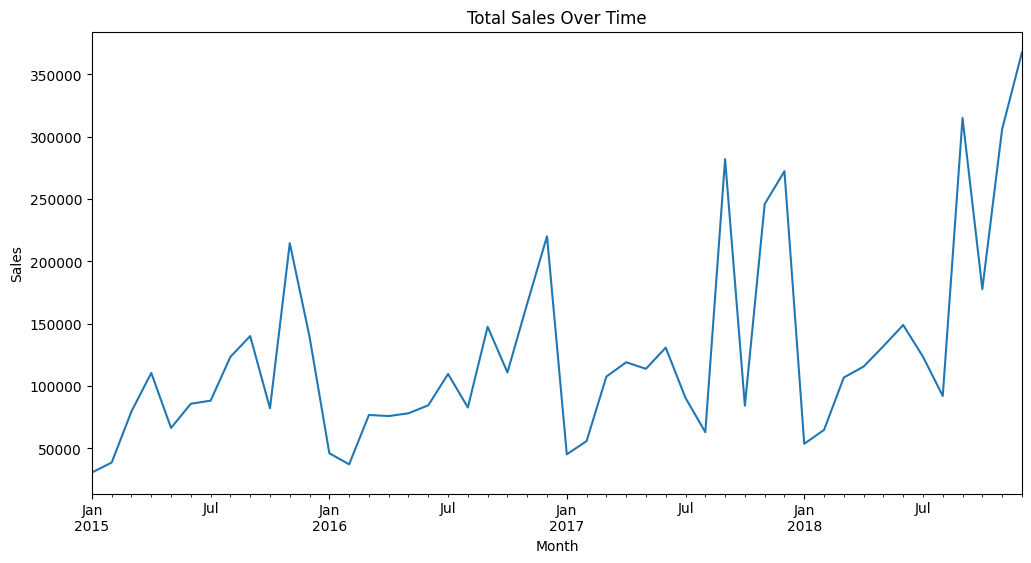

In [ ]:
# Plot total sales over time
plt.figure(figsize=(12,6))
sales_over_time.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

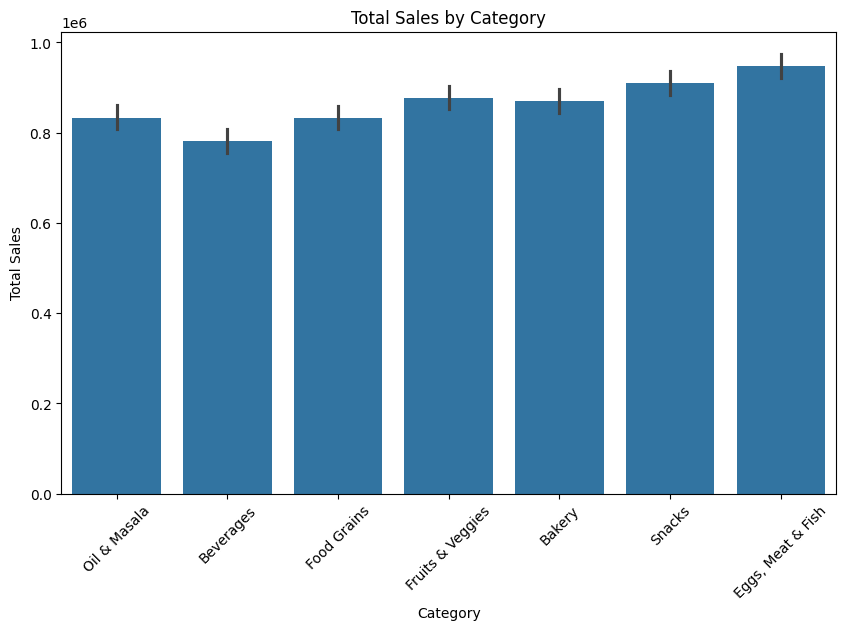

In [ ]:
# Let's analyze sales distribution across categories and regions.
# Sales by Category
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

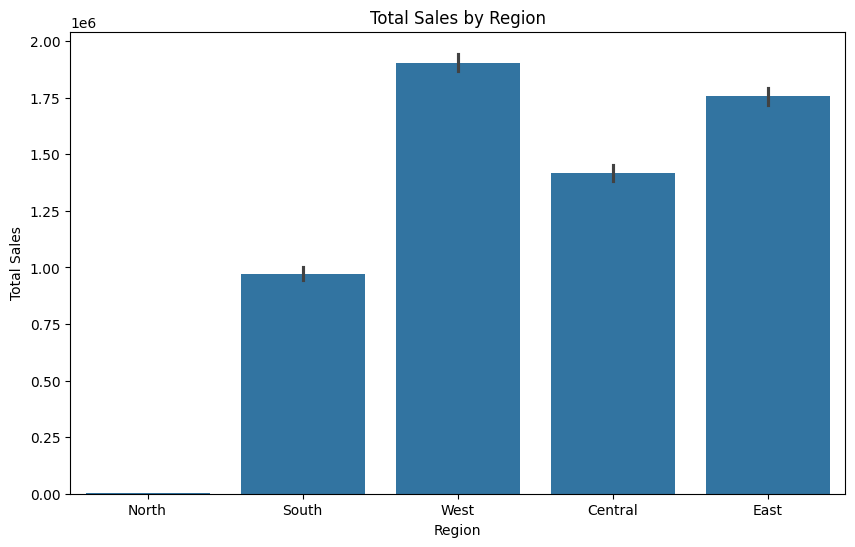

In [ ]:
# Sales by Region
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
# Group by 'Customer Name' and sum the 'Sales' to find top customers
# We only need to sum the 'Sales' column, so select it explicitly
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

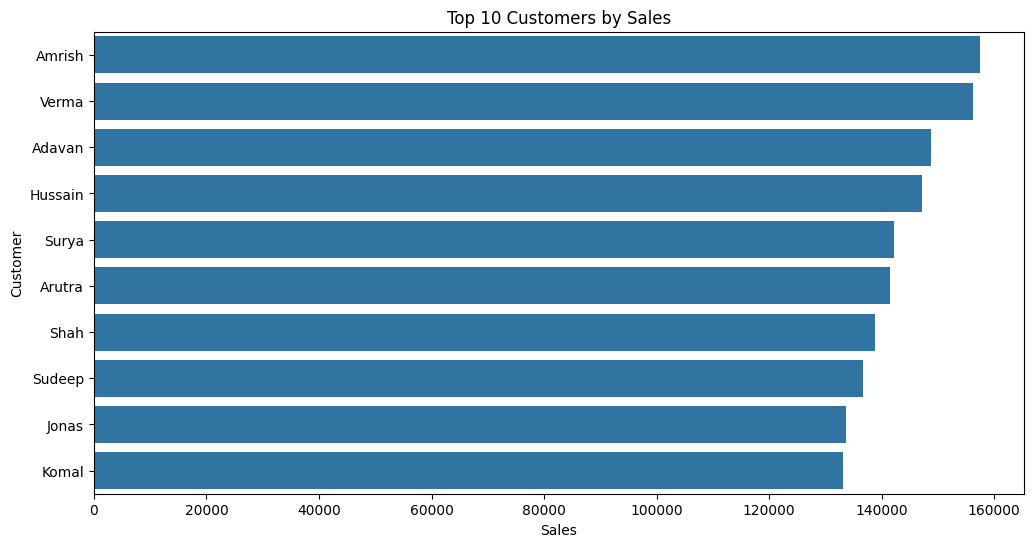

In [ ]:
# Plot top 10 customers
plt.figure(figsize=(12,6))
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title('Top 10 Customers by Sales')
plt.xlabel('Sales')
plt.ylabel('Customer')
plt.show()

In [ ]:
# Show the top customers data
print(top_customers)
# Save the cleaned and analyzed data for further use
cleaned_data_path = 'Cleaned_Supermart_Sales_Data.csv'
df.to_csv(cleaned_data_path, index=False)
print('Cleaned and analyzed data saved to', cleaned_data_path)

Customer Name
Amrish     157400
Verma      156248
Adavan     148837
Hussain    147228
Surya      142099
Arutra     141448
Shah       138827
Sudeep     136704
Jonas      133593
Komal      133173
Name: Sales, dtype: int64
Cleaned and analyzed data saved to Cleaned_Supermart_Sales_Data.csv


In [ ]:
# Show the first few rows of the grouped data to verify
print(sales_over_time.head())

Order Date
2015-01     30730
2015-02     38759
2015-03     79758
2015-04    110584
2015-05     66499
Freq: M, Name: Sales, dtype: int64


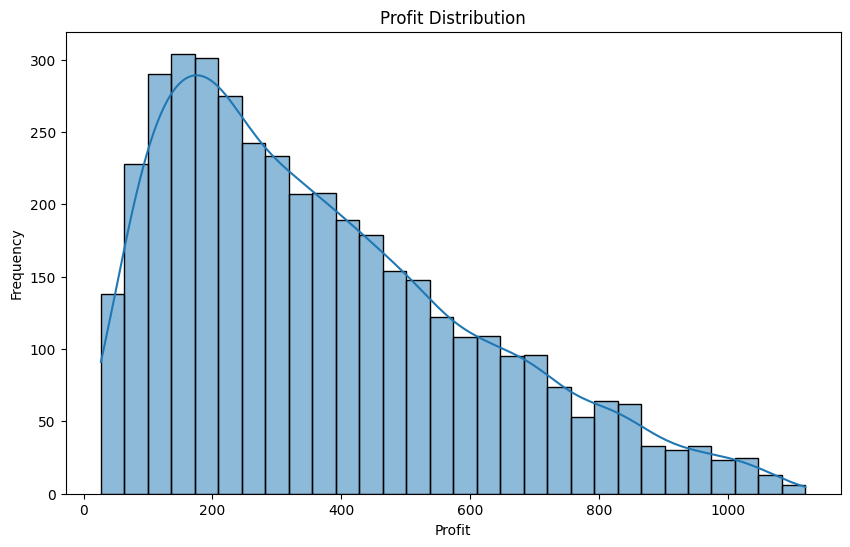

In [ ]:
# Plot profit distribution to understand profit margins
plt.figure(figsize=(10,6))
sns.histplot(df['Profit'], bins=30, kde=True)
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Summary statistics for profit
print(df['Profit'].describe())

count    4042.000000
mean      371.860225
std       239.387373
min        26.850000
25%       179.550000
50%       319.635000
75%       520.567500
max      1120.950000
Name: Profit, dtype: float64


In [ ]:
# Identify the most profitable products by grouping by 'Sub Category' and summing 'Profit'
# We will sort to find the top profitable subcategories
top_products = df.groupby('Sub Category')['Profit'].sum().sort_values(ascending=False).head(10)
# Show the top profitable subcategories
print(top_products)

Sub Category
Soft Drinks      95744.48
Health Drinks    93878.10
Noodles          83348.93
Breads & Buns    81835.28
Masalas          75958.83
Chocolates       75293.24
Cookies          73809.08
Cakes            73335.91
Mutton           64769.43
Spices           64660.48
Name: Profit, dtype: float64


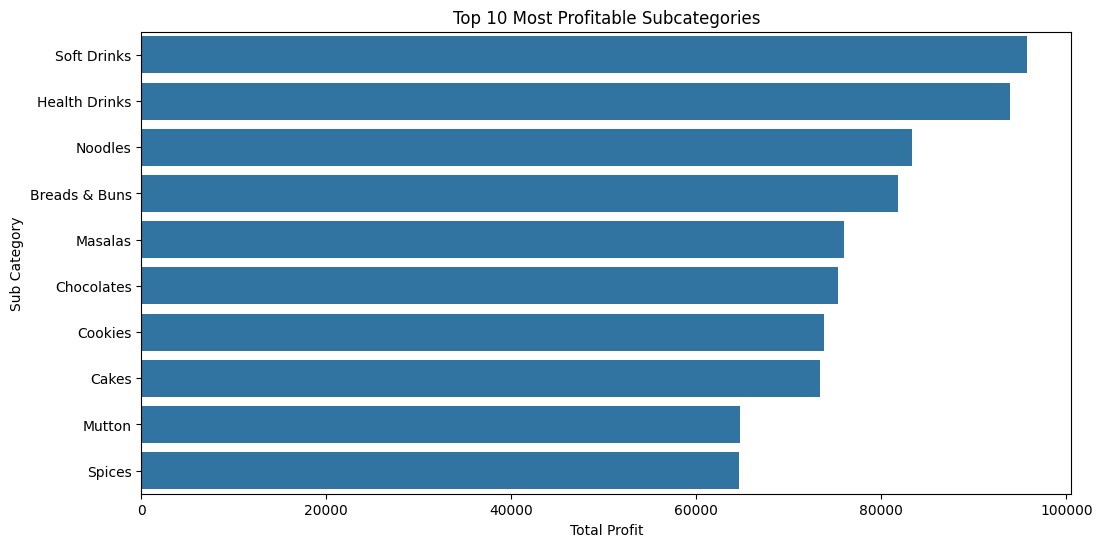

In [ ]:
# Plot the top profitable subcategories
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Most Profitable Subcategories')
plt.xlabel('Total Profit')
plt.ylabel('Sub Category')
plt.show()

In [ ]:
# To identify seasonal sales trends, we need to analyze sales data over time, focusing on patterns that repeat annually or seasonally.
# First, ensure the 'Order Date' column is in datetime format.
df['Order Date'] = pd.to_datetime(df['Order Date'])
# Extract year and month from 'Order Date' for seasonal analysis.
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
# Group by year and month to get total sales per month across all years.
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

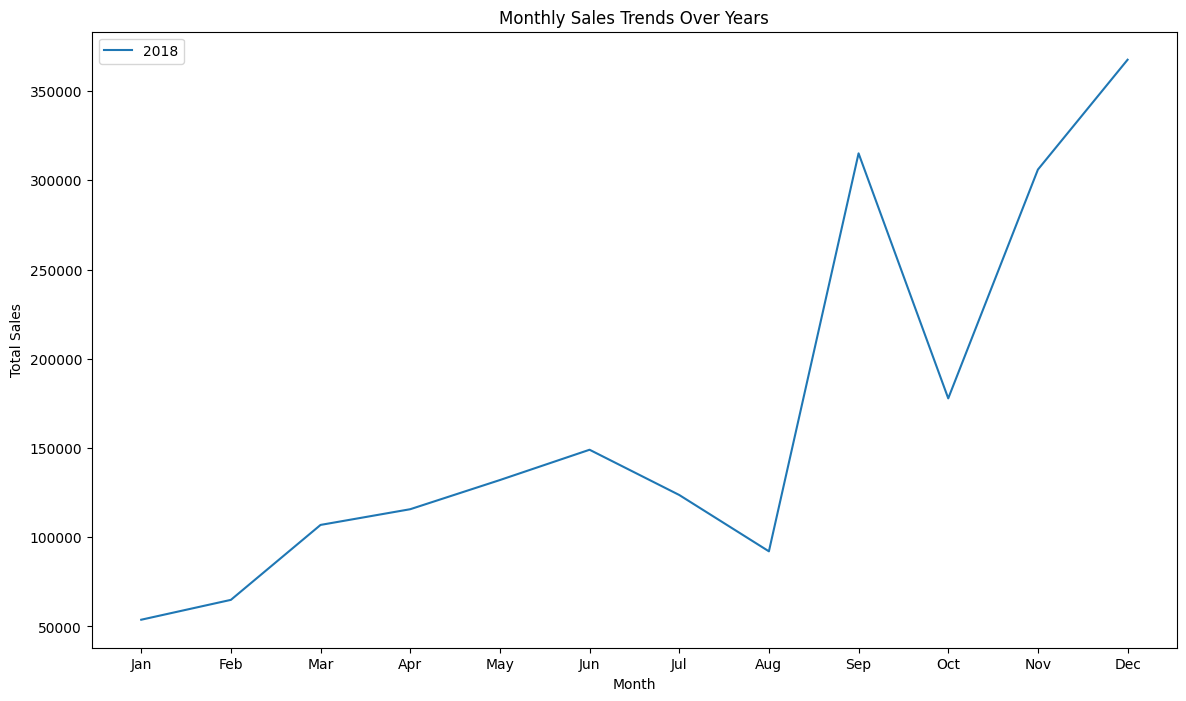

In [ ]:
# Plot the monthly sales to visualize seasonal patterns.
plt.figure(figsize=(14,8))
for year in monthly_sales['Year'].unique(): data = monthly_sales[monthly_sales['Year'] == year]
plt.plot(data['Month'], data['Sales'], label=str(year))
plt.title('Monthly Sales Trends Over Years')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()